# QAI Assignment-3

In [7]:
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Necessary libraries

In [11]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit import Aer
from qiskit.tools.jupyter.library import _generate_circuit_library_visualization
from qiskit.circuit.library import QFT
import numpy as np

# Quantum Fourier Transform (QFT) Implementation and Simulation

In [12]:
pi = np.pi
backend = Aer.get_backend('statevector_simulator')
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')
circuit = QuantumCircuit(q,c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
qft_circuit = QFT(num_qubits=5, approximation_degree=0, do_swaps=True,inverse=False,
insert_barriers=False, name="qft")
circuit = circuit.compose(qft_circuit)
circuit.measure(q,c)
circuit.draw(output="mpl", filename="qft1.png").show()
print(circuit)
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print("\n QFT Output")
print("-------------")
print(counts)

     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 
Job Status: job has successfully run

 QFT Output
-------------
{'01100': 23, '00011': 31, '10100': 33, '00100': 29, '10011': 36, '10000': 37, '00001': 34, '00110': 23, '00101': 33, '11011': 35, '01011': 35, '11000': 31, '01010': 33, '00010': 37, '11010': 33, '01110': 27, '11111': 34, '01000': 37, '01001': 31, '10001': 31, '01111': 32, '10010': 30, '10111': 20, '11001': 36, '11101': 24, '11100': 35, '10110': 32, '10101': 29, '00000': 28, '00111': 42, '01101': 31, '11110': 18}


# 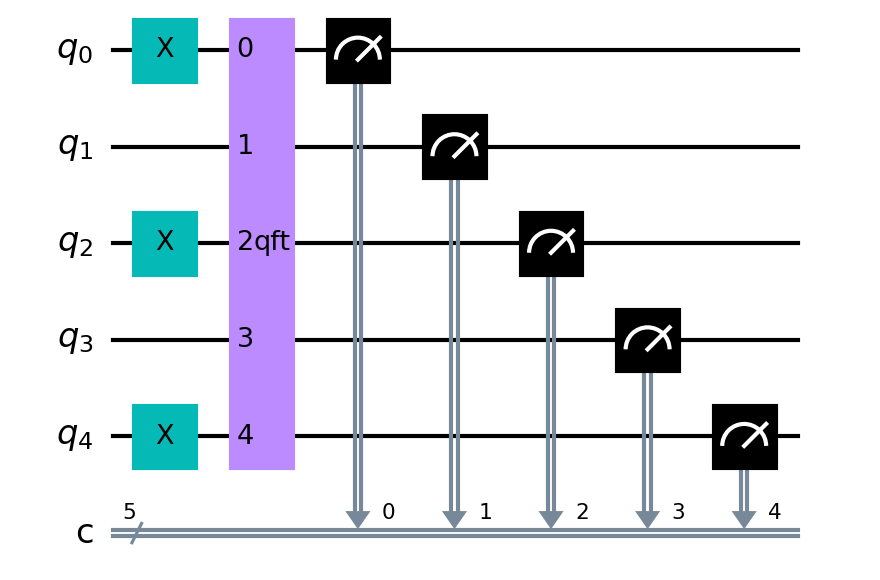

# Visualization of Quantum Circuit 

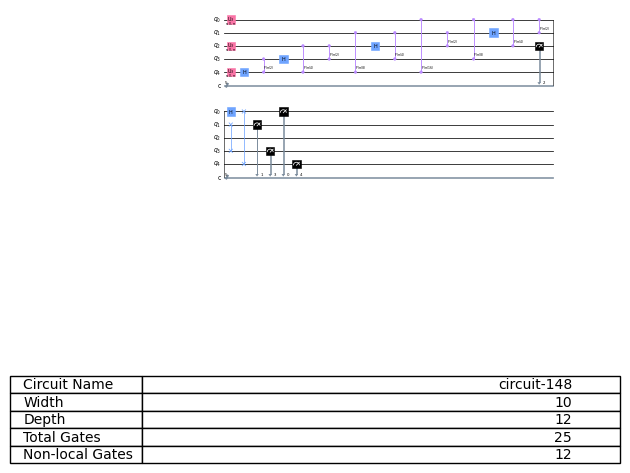

In [13]:
_generate_circuit_library_visualization(circuit)